In [146]:
import pandas as pd
import numpy as np

df=pd.read_csv(r'Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<Axes: >

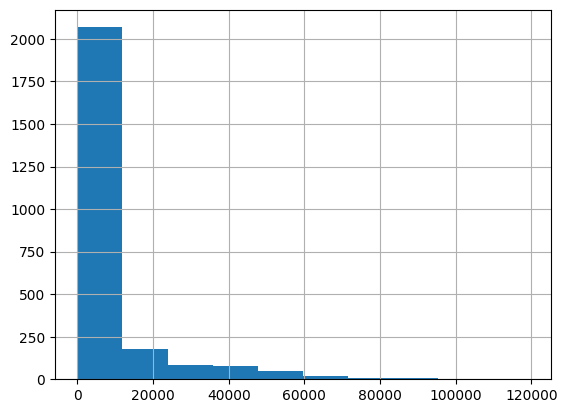

In [148]:
df['GDP'].hist()

<Axes: >

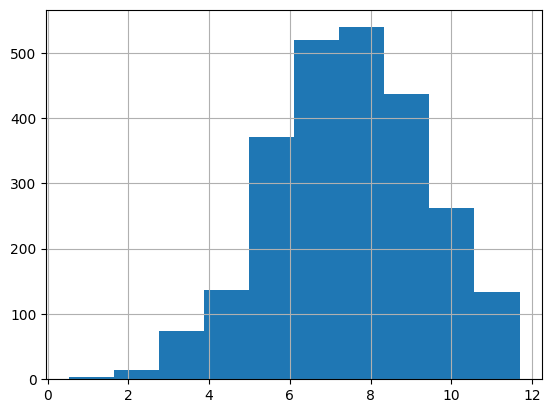

In [149]:
df['log_GDP']=np.log(df.GDP)
df['log_GDP'].hist()

<Axes: >

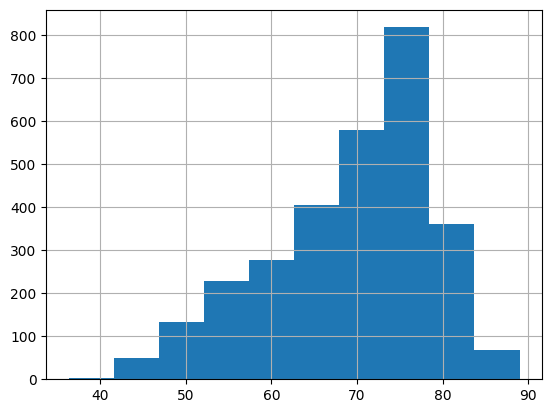

In [150]:
df['Life expectancy '].hist()

<Axes: xlabel='log_GDP', ylabel='Life expectancy '>

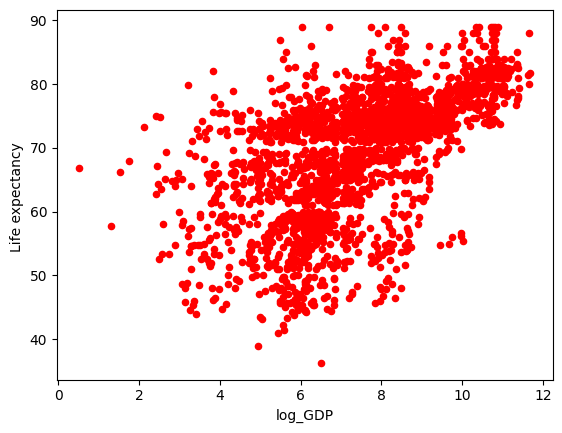

In [151]:
df.plot(kind='scatter', x='log_GDP', y='Life expectancy ', color='r')

In [152]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df['Life expectancy_transformed']=pt.fit_transform(df['Life expectancy '].values.reshape(-1,1))

<Axes: xlabel='log_GDP', ylabel='Life expectancy_transformed'>

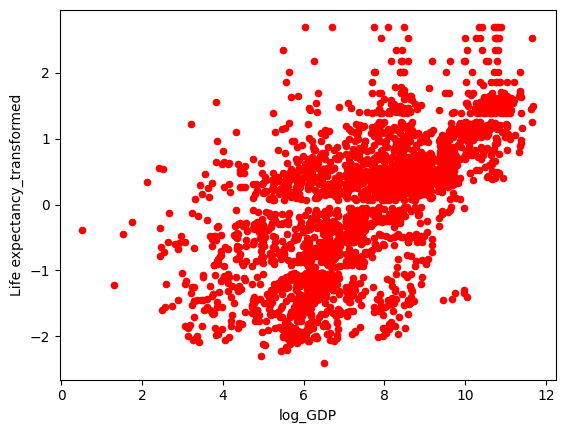

In [153]:
df.plot(kind='scatter', x='log_GDP', y='Life expectancy_transformed', color='r')

In [154]:
df=df.dropna()

In [155]:
df[['Life expectancy ','log_GDP']].corr()

,Life expectancy,log_GDP
Life expectancy,1.000000,0.532473
log_GDP,0.532473,1.000000


In [156]:
import statsmodels.api as sm

lin_reg= sm.OLS(df['GDP'],df['Life expectancy '])
reg1=lin_reg.fit()
df['predictions']= reg1.predict()
reg1.summary()

C:\Users\filip\AppData\Local\Temp\ipykernel_3956\3347570994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predictions']= reg1.predict()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GDP   R-squared (uncentered):                   0.233
Model:                            OLS   Adj. R-squared (uncentered):              0.233
Method:                 Least Squares   F-statistic:                              501.5
Date:                Wed, 27 Mar 2024   Prob (F-statistic):                    3.45e-97
Time:                        15:41:57   Log-Likelihood:                         -17709.
No. Observations:                1649   AIC:                                  3.542e+04
Df Residuals:                    1648   BIC:                                  3.543e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Life expectancy     88.1662      3.937     22.394      0.000      80.444      95.888
==============================================================================
Omnibus:                     1595.154   Durbin-Watson:                   1.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66455.600
Skew:                           4.649   Prob(JB):                         0.00
Kurtosis:                      32.678   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
import seaborn as sns

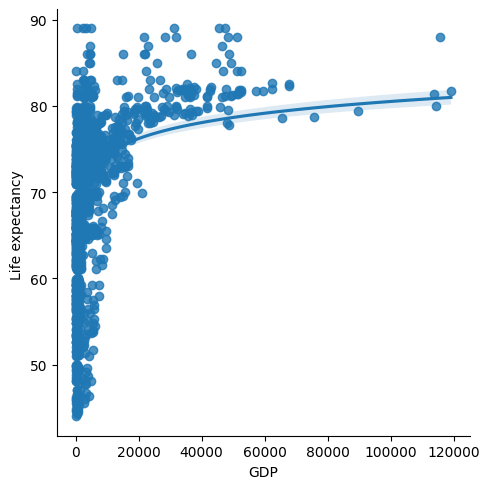

In [158]:
sns.lmplot(data=df,x='GDP',y='Life expectancy ',logx=True)

In [167]:
df[['Life expectancy ','log_GDP']].cov().loc['log_GDP','Life expectancy ']/df['log_GDP'].var()

2.6738651075538598

<Axes: xlabel='predictions', ylabel='GDP'>

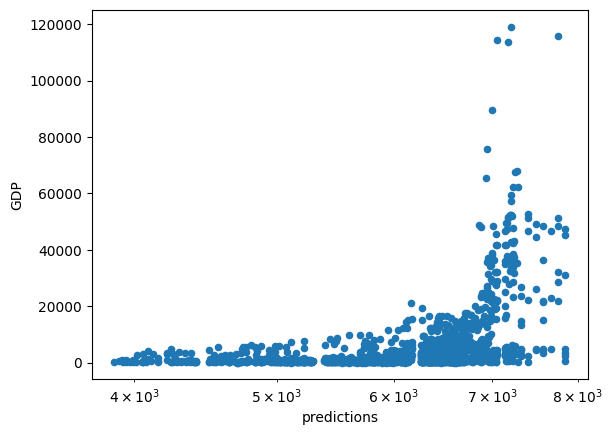

In [159]:
df.plot(kind='scatter',x='predictions',y='GDP',logx=True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['const']=1

#fai modello con const,log_GDP e entrambi
#aka: y=a, y=bx e y=a+bx